# Importing modules


In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as sc
from statsmodels.stats.power import TTestIndPower, TTestPower
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
Pth = os.path.abspath(os.getcwd())
sys.path.insert(1, Pth+'/functions')
from ErrorBarsForMeans import *
from ScatterPlot import *
figpath = Pth+"/plots/"
filepath = Pth+"/data/"

# Estimating the sample size for the experiment

In [2]:
# estimate sample size via power analysis
# parameters for power analysis
# Egly 1994
M1 = 47-34.0 
SD1 = 6*np.sqrt(15.0)
# Cathleen M. Moore, Steven Yantis, and Barry Vaughan, 1998
M2 = np.mean([41.0,32.0])
SD2 = np.mean([(41.0/3.53)*np.sqrt(17), (32.0/2.46)*np.sqrt(17)])
# SHOMSTEIN AND YANTIS, 2004
M3 = 20.0
SD3 = 20.0*np.sqrt(18)
# Mean of the effect sizes
effect = np.mean([M1,M2,M3])/np.mean([SD1,SD2,SD3])/2
alpha = 0.05
power = 0.6
# perform power analysis
analysis = TTestPower()
result = analysis.solve_power(effect, power=power, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 104.297


## Import Data

In [3]:
data_cba = pd.read_csv(filepath+'/exp2_CBA.csv',dtype=float)
data_oba = pd.read_csv(filepath+'/exp2_OBA.csv',dtype=float)
data_fam = pd.read_csv(filepath+'/exp2_familiarity.csv', dtype=float)
print '\nData shape (rows, columns):', data_fam.shape
display(data_fam.head())
print '\nData shape (rows, columns):', data_cba.shape
display(data_cba.head())
print '\nData shape (rows, columns):', data_oba.shape
display(data_oba.head())


Data shape (rows, columns): (1520, 7)


,name,rt,pair,foil,trial,error,first_press
0,1.0,2.413557,1.0,5.0,13.0,1.0,2.0
1,1.0,2.891957,1.0,10.0,9.0,0.0,1.0
2,1.0,1.654685,4.0,6.0,20.0,0.0,2.0
3,1.0,1.929423,1.0,5.0,1.0,0.0,1.0
4,1.0,1.537012,2.0,7.0,15.0,1.0,2.0



Data shape (rows, columns): (53340, 9)


,name,rt,correct_key,error,trial,pair1,pair2,trial_types,validity
0,1.0,0.548988,1.0,1.0,37.0,4.0,9.0,0.0,2.0
1,1.0,1.045777,1.0,1.0,134.0,4.0,3.0,3.0,2.0
2,1.0,0.771233,2.0,1.0,120.0,2.0,1.0,3.0,2.0
3,1.0,0.603578,1.0,1.0,139.0,4.0,3.0,3.0,2.0
4,1.0,2.338821,2.0,0.0,39.0,4.0,9.0,3.0,2.0



Data shape (rows, columns): (26496, 9)


,name,rt,correct_key,error,trial,pair1,pair2,trial_types,validity
0,50.0,1.075675,2.0,0.0,40.0,4.0,10.0,1.0,1.0
1,50.0,0.547454,1.0,0.0,7.0,1.0,11.0,1.0,1.0
2,50.0,0.639102,1.0,0.0,91.0,4.0,11.0,0.0,2.0
3,50.0,0.831776,2.0,0.0,13.0,2.0,9.0,1.0,1.0
4,50.0,0.665792,2.0,0.0,9.0,1.0,11.0,1.0,1.0


In [4]:
data = [data_cba,data_oba]
d_label = ["CBA","OBA"]
d_cba_rt = [pd.DataFrame(columns=data_cba.columns) for i in range(4)]
d_oba_rt = [pd.DataFrame(columns=data_oba.columns) for i in range(4)]
d_cba_err = [pd.DataFrame(columns=data_cba.columns) for i in range(4)]
d_oba_err = [pd.DataFrame(columns=data_oba.columns) for i in range(4)]
data_RT_err = [[d_cba_rt, d_oba_rt], [d_cba_err, d_oba_err]]
behave_type = ["RT", "Error"]

for i in range(len(data_RT_err)):
    for di,d in enumerate(data):
        
        # excluding explicit learner
        # did not finish the experiment
        d = d[~d['name'].isin([51,83,97])]
        # explicit knowledge
        d = d[~d['name'].isin([4,15,39,53,68])]
        data_fam = data_fam[~data_fam['name'].isin([4,15,39,53,68])]
        # getting the participants'names
        names = np.unique(d['name'])
        n = len(names)
        print d_label[di]
        print names
        print n

        for name in names:
            
            NumSplit = 3.0 if name<19 else 4.0
            # the RT data and the error
            subD = d[d['name'].isin([name])]
            print name
            print 'Data: ', subD.shape
            
            subD1 = subD[subD.index < round(subD.index[0]+subD.shape[0]/NumSplit)]
            frames = [data_RT_err[i][di][0], subD1]
            data_RT_err[i][di][0] = pd.concat(frames)
            
            subD2 = subD[(subD.index >= round(subD.index[0]+subD.shape[0]/NumSplit)) & (subD.index < round(subD.index[0]+2*subD.shape[0]/NumSplit))]
            frames = [data_RT_err[i][di][1], subD2]
            data_RT_err[i][di][1] = pd.concat(frames)

            if name<19:
                NumSplit = 3.0
                subD3 = subD[subD.index >= round(subD.index[0]+2*subD.shape[0]/NumSplit)]
                frames = [data_RT_err[i][di][2], subD3]
                data_RT_err[i][di][2] = pd.concat(frames)
                
                print behave_type[i], subD1.shape
                print behave_type[i], subD2.shape
                print behave_type[i], subD3.shape
                print behave_type[i], data_RT_err[i][di][0].shape
                print behave_type[i], data_RT_err[i][di][1].shape
                print behave_type[i], data_RT_err[i][di][2].shape
                
            else:
                subD3 = subD[(subD.index >= round(subD.index[0]+2*subD.shape[0]/NumSplit)) & (subD.index < round(subD.index[0]+3*subD.shape[0]/NumSplit))]
                frames = [data_RT_err[i][di][2], subD3]
                data_RT_err[i][di][2] = pd.concat(frames)

                subD4 = subD[subD.index >= round(subD.index[0]+3*subD.shape[0]/NumSplit)]
                frames = [data_RT_err[i][di][3], subD4]
                data_RT_err[i][di][3] = pd.concat(frames)
                
                print behave_type[i], subD1.shape
                print behave_type[i], subD2.shape
                print behave_type[i], subD3.shape
                print behave_type[i], subD4.shape
                
                print behave_type[i], data_RT_err[i][di][0].shape
                print behave_type[i], data_RT_err[i][di][1].shape
                print behave_type[i], data_RT_err[i][di][2].shape
                print behave_type[i], data_RT_err[i][di][3].shape
                

CBA
[ 1.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38.
 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 52. 54. 55. 56. 57. 58. 59.
 60. 61. 62. 63. 64. 65. 66. 67. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78.
 79. 80. 81. 82. 84. 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 98.]
90
1.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
2.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (288, 9)
RT (288, 9)
RT (288, 9)
3.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (432, 9)
RT (432, 9)
RT (432, 9)
5.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (576, 9)
RT (576, 9)
RT (576, 9)
6.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (720, 9)
RT (720, 9)
RT (720, 9)
7.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (864, 9)
RT (864, 9)
RT (864, 9)
8.0
Data:  (432, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (1008, 9)
RT (10

RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (12418, 9)
RT (12418, 9)
RT (12417, 9)
RT (10114, 9)
94.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (12562, 9)
RT (12562, 9)
RT (12561, 9)
RT (10258, 9)
95.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (12706, 9)
RT (12706, 9)
RT (12705, 9)
RT (10402, 9)
96.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (12850, 9)
RT (12850, 9)
RT (12849, 9)
RT (10546, 9)
98.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (12994, 9)
RT (12994, 9)
RT (12993, 9)
RT (10690, 9)
OBA
[50. 52. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 69. 70.
 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 98.]
44
50.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
52.0
Data:  (576, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (144, 9)
RT (288, 9)
RT (288, 9)

Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (6624, 9)
Error (6624, 9)
Error (6624, 9)
Error (4320, 9)
50.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (6768, 9)
Error (6768, 9)
Error (6768, 9)
Error (4464, 9)
52.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (6912, 9)
Error (6912, 9)
Error (6912, 9)
Error (4608, 9)
54.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (7056, 9)
Error (7056, 9)
Error (7056, 9)
Error (4752, 9)
55.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (7200, 9)
Error (7200, 9)
Error (7200, 9)
Error (4896, 9)
56.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (7344, 9)
Error (7344, 9)
Error (7344, 9)
Error (5040, 9)
57.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (7488, 9)
Error (7488, 9)
Error (7488, 9)
Error (5184, 9)
58.0
D

Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (1728, 9)
Error (1728, 9)
Error (1728, 9)
Error (1728, 9)
64.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (1872, 9)
Error (1872, 9)
Error (1872, 9)
Error (1872, 9)
65.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (2016, 9)
Error (2016, 9)
Error (2016, 9)
Error (2016, 9)
66.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (2160, 9)
Error (2160, 9)
Error (2160, 9)
Error (2160, 9)
67.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (2304, 9)
Error (2304, 9)
Error (2304, 9)
Error (2304, 9)
69.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (2448, 9)
Error (2448, 9)
Error (2448, 9)
Error (2448, 9)
70.0
Data:  (576, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (144, 9)
Error (2592, 9)
Error (2592, 9)
Error (2592, 9)
Error (2592, 9)
71.0
D

## Excluding trials with errors for the RT analysis

In [5]:
for i,group in enumerate(data_RT_err[0]):
    for j,dataset in enumerate(group):
        print 'Dataset NO: ', j
        data_RT_err[0][i][j] = dataset[dataset.error != 1]
        print 'Data shape (rows, columns):', data_RT_err[0][i][j].shape

Dataset NO:  0
Data shape (rows, columns): (12098, 9)
Dataset NO:  1
Data shape (rows, columns): (12353, 9)
Dataset NO:  2
Data shape (rows, columns): (12406, 9)
Dataset NO:  3
Data shape (rows, columns): (10310, 9)
Dataset NO:  0
Data shape (rows, columns): (6088, 9)
Dataset NO:  1
Data shape (rows, columns): (6063, 9)
Dataset NO:  2
Data shape (rows, columns): (6044, 9)
Dataset NO:  3
Data shape (rows, columns): (6056, 9)


# Comparing chunk and object based effects

CBA
Descriptive stat:
RT 0.6647667444444445 0.13050235931843968
RT  Invalid: 0.7096044055555556 0.14617512367902136
RT  Valid: 0.6322242222222221 0.12112968898450928
RT  Invalid-valid: 0.07738018333333332 0.06432092808381741
RT  Cued: 0.71198165 0.14838399658282356
RT  Uncued: 0.7038153111111111 0.14457807924883007
RT  Uncued-cued: 0.00816633888888889 0.029891094333042094
Significance of the Effects
N: 90
T test for CBA effect in RT:  Ttest_relResult(statistic=2.5773926553968765, pvalue=0.011599711390037624) -0.27320307506646513
T test for CBA validity effect in RT:  Ttest_relResult(statistic=11.349388314336373, pvalue=5.500054777050145e-19) -1.203032755256551


OBA
Descriptive stat:
RT 0.5982388977272728 0.0800966849976256
RT  Invalid: 0.6474385227272728 0.09898609348407544
RT  Valid: 0.566249125 0.07275301503656403
RT  Invalid-valid: 0.08118939772727275 0.05445165100360091
RT  Cued: 0.6588819090909092 0.10246623892655131
RT  Uncued: 0.6329644659090908 0.0908052010249762
RT  Uncued-cu

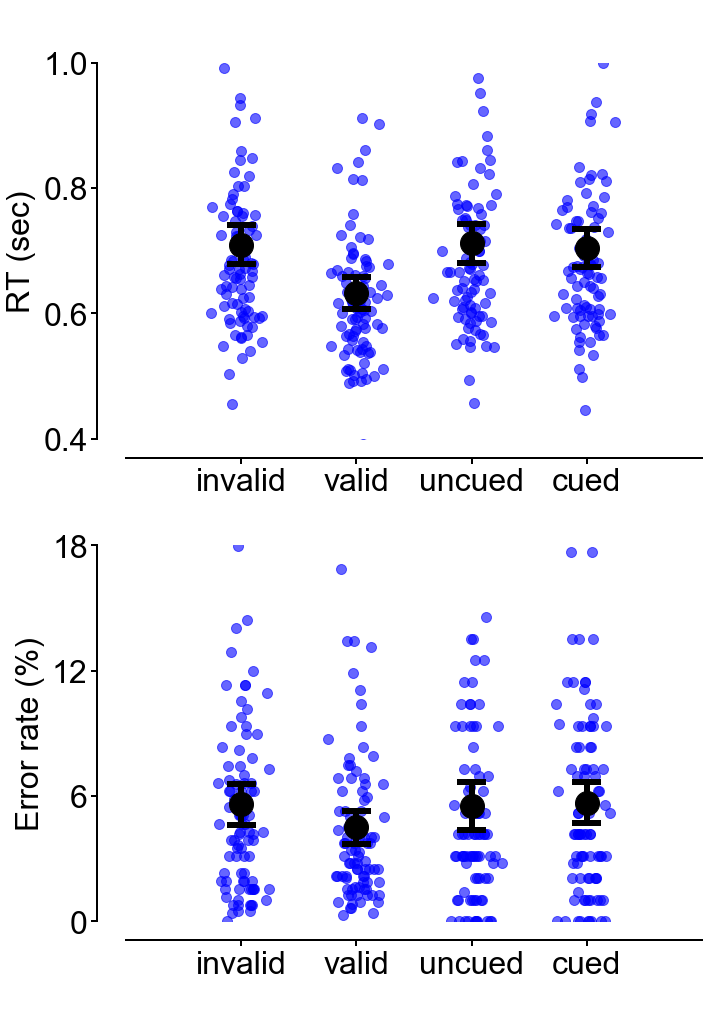

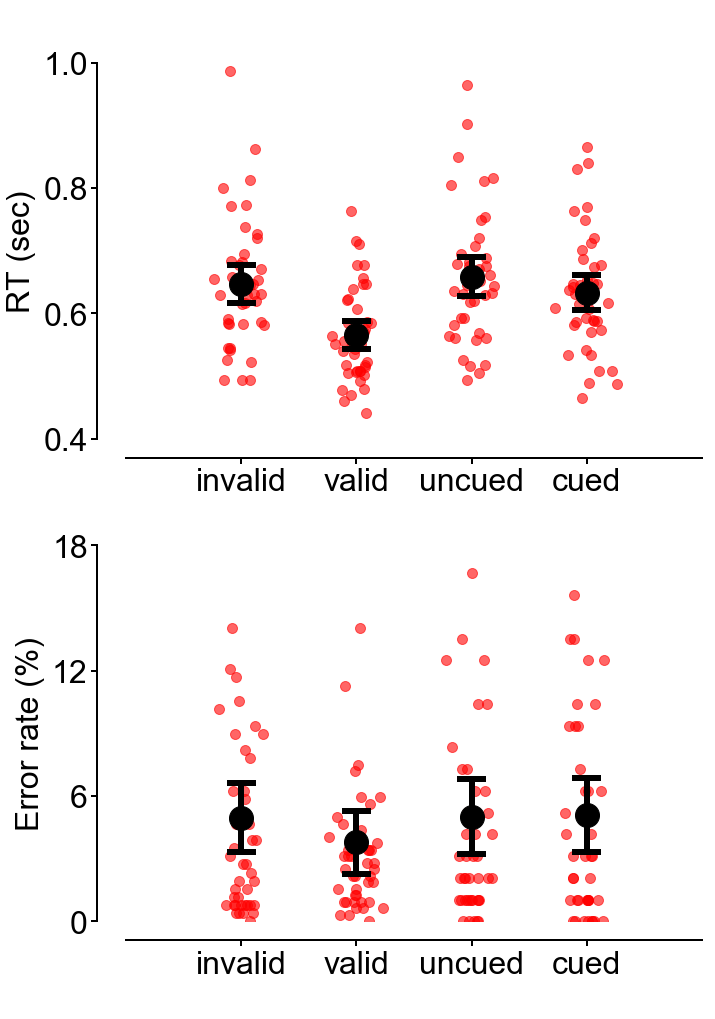

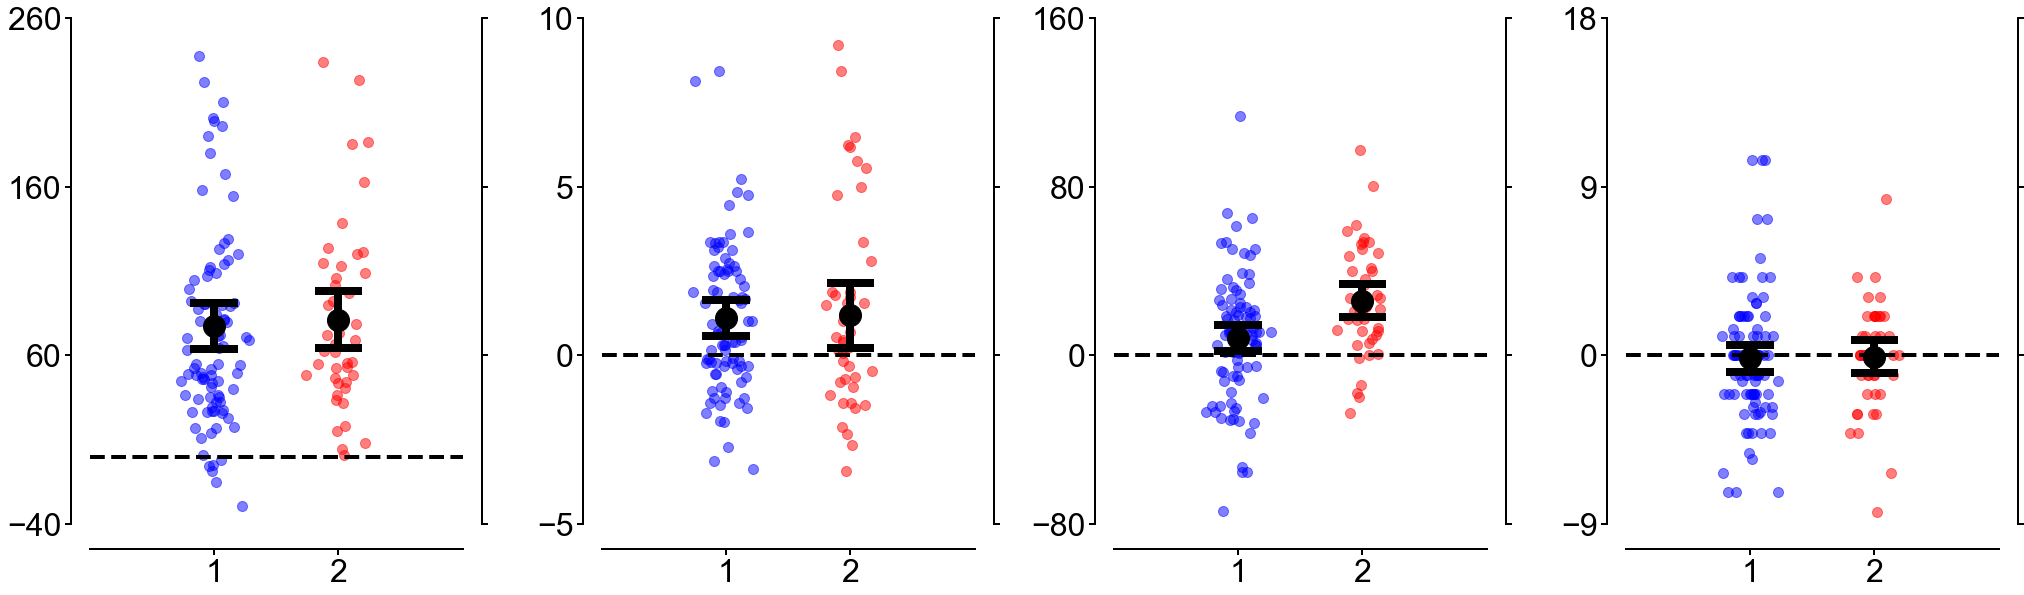

In [6]:
type_lab = ["CBA", "OBA"]
behave_lab = ["RT","err"]
above_82 = np.unique(data_RT_err[0][0][0]['name'])>49
for t,types in enumerate(data_RT_err):
    oba = []
    cba = []
    for g,group in enumerate(types):
        frames = []
        for dataset in group:
            frames.append(dataset)
        
        D_all = pd.concat(frames)
        ## saving for later within-consistency analysis
        if (t==0) & (g==0):
            allRT_cba = D_all.copy()
        ## Extracting sum stat
        if t==0:
            D = pd.pivot_table(D_all, index=['name'], columns=['trial_types'], values=['rt'], aggfunc=[np.median])
            D_v = pd.pivot_table(D_all, index=['name'], columns=['validity'], values=['rt'], aggfunc=[np.median])
            D_m = pd.pivot_table(D_all, index=['name'], values=['rt'], aggfunc=[np.median])
        else:
            D = pd.pivot_table(D_all, index=['name'], columns=['trial_types'], values=['error'], aggfunc=[np.mean])
            D_v = pd.pivot_table(D_all, index=['name'], columns=['validity'], values=['error'], aggfunc=[np.mean])
            D_m = pd.pivot_table(D_all, index=['name'], values=['error'], aggfunc=[np.mean]) 
        
        ## Statistics on the sum stat
        #descriptive
        print type_lab[g]
        print "Descriptive stat:"
        print behave_lab[t], np.mean(D_m.values), np.std(D_m.values)
        print behave_lab[t]," Invalid:", np.mean(D_v.values[:,1]), np.std(D_v.values[:,1])
        print behave_lab[t], " Valid:", np.mean(D_v.values[:,0]), np.std(D_v.values[:,0])
        print behave_lab[t], " Invalid-valid:", np.mean(D_v.values[:,1]-D_v.values[:,0]), np.std(D_v.values[:,1]-D_v.values[:,0])
        print behave_lab[t], " Cued:", np.mean(D.values[:,3]), np.std(D.values[:,3])
        print behave_lab[t], " Uncued:", np.mean(D.values[:,2]), np.std(D.values[:,2])
        print behave_lab[t], " Uncued-cued:", np.mean(D.values[:,3]-D.values[:,2]), np.std(D.values[:,3]-D.values[:,2])
        #stat test
        print "Significance of the Effects"
        print 'N:', len(D.values[:,3])
        X1 = D.values[:,3]
        X2 = D.values[:,2]
        print 'T test for '+type_lab[g]+' effect in '+behave_lab[t]+': ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
        np.savetxt(filepath+"results/"+type_lab[g]+'_'+behave_lab[t]+'.csv', np.vstack(((X1,X2))).T)

        X1 = D_v.values[:,1]
        X2 = D_v.values[:,0]
        print 'T test for '+type_lab[g]+' validity effect in '+behave_lab[t]+': ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
        print "\n"
        np.savetxt(filepath+"results/"+type_lab[g]+'_'+behave_lab[t]+'_v.csv', np.vstack(((X1,X2))).T)
        if g==0:
            cba.append([D,D_v,D_m])
        else:
            oba.append([D,D_v,D_m])
                   
    # comparing chunks and objects
    print "\n"
    X1 = oba[0][2].values
    X2 = cba[0][2].values[above_82,:]
    print 'Comparing object and shape: '
    print (behave_lab[t],' diff: ',sc.ttest_rel(X1,X2),(0-np.mean(X1-X2))/np.std(X1-X2))
    np.savetxt(filepath+"results/"+behave_lab[t]+'_diff.csv', np.hstack(((X1, X2))))

    print 'Validity:'
    N1 = len(oba[0][1].values[:,1]-oba[0][1].values[:,0])
    N2 = len(cba[0][1].values[above_82,1]-cba[0][1].values[above_82,0])
    X1 = oba[0][1].values[:,1]-oba[0][1].values[:,0]
    X2 = cba[0][1].values[above_82,1]-cba[0][1].values[above_82,0]
    print behave_lab[t], ' diff: ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
    np.savetxt(filepath+'results/OBA_CBA_diff_v_'+behave_lab[t]+'.csv', np.vstack(((X1, X2))).T)

    print 'Object:'
    N1 = len(oba[0][0].values[:,3]-oba[0][0].values[:,2])
    N2 = len(cba[0][0].values[above_82,3]-cba[0][0].values[above_82,2])
    X1 = oba[0][0].values[:,3]-oba[0][0].values[:,2]
    X2 = cba[0][0].values[above_82,3]-cba[0][0].values[above_82,2]
    print behave_lab[t],' diff: ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
    print "\n"
    np.savetxt(filepath+'results/OBA_CBA_diff_'+behave_lab[t]+'.csv', np.vstack(((X1, X2))).T)
    
    if t==0:
        RTs = [cba[0],oba[0]]
    else:
        Errs = [cba[0],oba[0]]

## plots
data = [[[RTs[0][1].values[:,1], RTs[0][1].values[:,0], RTs[0][0].values[:,3], RTs[0][0].values[:,2]],
         [Errs[0][1].values[:,1]*100, Errs[0][1].values[:,0]*100, Errs[0][0].values[:,3]*100, Errs[0][0].values[:,2]*100]]]

ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [10,14], 
                  axeslimit = [[0.4,0,0.4,0],[1.0001,18.00001,1.0001,18.00001],[0.2,6,0.2,6]], 
                  axisLabels = [[' ',' ',' ',' '],['RT (sec)', 'Error rate (%)']], 
                  SameAxisLabel = False, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = ' ', 
                  ThresValue = [], 
                  AxisTicks = [['invalid','valid','uncued','cued'],[]], 
                  SaveFigName = figpath+'exp2_descriptive_CBA.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['b','b','b','b'], 'DotsTransp':0.6, 'OutlierDotsColor':'r'})

data = [[[RTs[1][1].values[:,1], RTs[1][1].values[:,0], RTs[1][0].values[:,3], RTs[1][0].values[:,2]],
         [Errs[1][1].values[:,1]*100, Errs[1][1].values[:,0]*100, Errs[1][0].values[:,3]*100, Errs[1][0].values[:,2]*100]]]
ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [10,14], 
                  axeslimit = [[0.4,0,0.4,0],[1.0001,18.00001,1.0001,18.00001],[0.2,6,0.2,6]], 
                  axisLabels = [[' ',' ',' ',' '],['RT (sec)', 'Error rate (%)', 'RT (sec)', 'Error rate (%)']], 
                  SameAxisLabel = False, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = ' ', 
                  ThresValue = [], 
                  AxisTicks = [['invalid','valid','uncued','cued'],[]], 
                  SaveFigName = figpath+'exp2_descriptive_OBA.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['r','r','r','r'], 'DotsTransp':0.6, 'OutlierDotsColor':'r'})

multi1 = 100
multi2 = 1000
data = [[[(RTs[0][1].values[:,1]-RTs[0][1].values[:,0])*multi2,(RTs[1][1].values[:,1]-RTs[1][1].values[:,0])*multi2]],
        [[(Errs[0][1].values[:,1]-Errs[0][1].values[:,0])*multi1,(Errs[1][1].values[:,1]-Errs[1][1].values[:,0])*multi1]],
        [[(RTs[0][0].values[:,3]-RTs[0][0].values[:,2])*multi2, (RTs[1][0].values[:,3]-RTs[1][0].values[:,2])*multi2]],
        [[(Errs[0][0].values[:,3]-Errs[0][0].values[:,2])*multi1, (Errs[1][0].values[:,3]-Errs[1][0].values[:,2])*multi1]]]

lim = [[-0.04*multi2,-0.05*multi1,-0.08*multi2,-0.09*multi1],[0.26000000001*multi2,0.10000000001*multi1,0.16000000001*multi2,0.18000000001*multi1],[0.1*multi2,0.05*multi1,0.08*multi2,0.09*multi1]]
ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [28,8], 
                  axeslimit = lim, 
                  axisLabels = [[],[]], 
                  SameAxisLabel = True, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = '', 
                  ThresValue = [0,0,0,0], 
                  AxisTicks = [[],[]], 
                  SaveFigName = figpath+'/exp2_CBA_OBA.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  Axis = 'both',
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.16, 'ErrWid1':8, 'ErrWid2':8, 'sizeMean':22, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['b','r','b','r'], 'DotsTransp':.5, 'OutlierDotsColor':'r'},
                 FigureLayout = [1,5.2,1,1])

# Familiarity

statistical learning
one sample t-test; t-value=  [-6.46317971] p value=  [5.33383556e-09] 0.6850956794435665


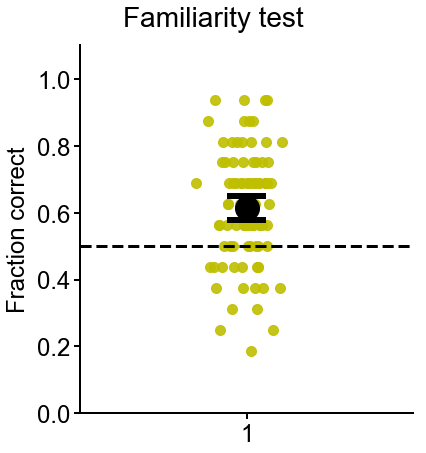

0.6145833333333334


In [7]:
pivot = pd.pivot_table(data_fam, index=['name'], values=['error'],aggfunc=[np.mean])
stat_learning1 = sc.ttest_1samp(pivot.values,0.5)

print 'statistical learning'
print 'one sample t-test; t-value= ', stat_learning1[0], 'p value= ', stat_learning1[1], (0.5-np.mean(pivot.values))/np.std(pivot.values)

fam_perf = 1-pivot.values
data = [[[fam_perf]]]
ErrorBarsForMeans(data, SpreadOfX = 0.1, YError = 'CI', plotsize = [6,6], axeslimit = [[0],[1.1],[0.2]], axisLabels = [[],['Fraction correct']], SameAxisLabel = True, SubplotTitles = [], SameSubplotTitles = True, plotTitle = 'Familiarity test', ThresValue = [0.5], AxisTicks = [[],[]], SaveFigName = [], Outliers = [],
                        titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'24'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k'], 'DotsColor':['y'],'DotsTransp':0.9,'OutlierDotsColor':'r'})
print np.mean(fam_perf)

## Correlation btw familiarity and the CBA

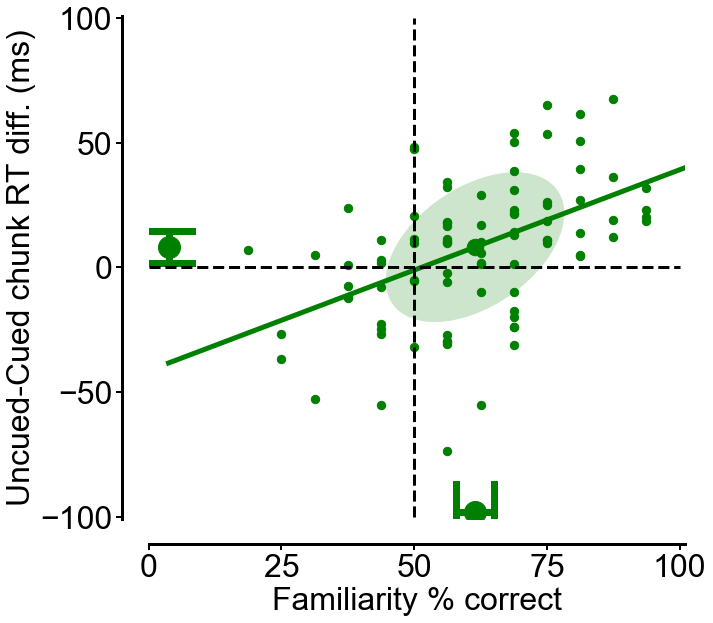

Correlation btw. familiarity and object effect 0.45084566849703234 8.224198454353555e-06 0.6057618812586936 0.2629948720356579


In [8]:
x2 = fam_perf[:,0]
y1 = (RTs[0][0].values[:,3]-RTs[0][0].values[:,2])
multi2 = 100
multi = 1000
lim1 = [[0.0*multi2],[1.00000000000001*multi2],[0.25*multi2]]
lim2 = [[-0.1*multi],[0.100000001*multi],[0.05*multi]]

data = [
    [
        [[x2*multi2, y1*multi]]
    ]

]

ScatterForCorrelation(data,
                        SpreadOfX = 0.1,
                        YError = 'CI',
                        NoStd = 1,
                        plotsize = [10,10],
                        axeslimitX = lim1,
                        axeslimitY = lim2,
                        axisLabels = [['Familiarity % correct'],['Uncued-Cued chunk RT diff. (ms)']],
                        SameAxisLabel = True,
                        ConditionLabels = [],
                        SameConditionLabels = True,
                        SubplotTitles = [],
                        SameSubplotTitles = False,
                        plotTitle = '',
                        ThresValue = [50,0],
                        SameThresValue = True,
                        RegressionLine = [True],
                        AxisTicks = [[],[]],
                        SameAxisTicks = True,
                        SaveFigName = figpath+'/Exp2_Corr_OBA_Fam.pdf',
                        Outliers = [],
                        SameErrorEllipseColor = True,
                        ErrorEllipse = {'color':['g','r'],'alpha':0.2},
                        axisTouching = True,
                        ErrorBar = {'ErrDist':[[0.13],[0.2]], 'ErrSize':0.6, 'ErrWid':7, 'sizedots':70, 'sizeMean':22, 'ErrColor':['g','r'], 'DotsColor':['g','r'],'OutlierDotsColor':'r','RegLineWid':5},
                        titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        LegendPos = {'LegendPosition':'upper left'},
                        FigureLayout = [1,1.3,1.8,0.85])

# correlations
r1,p1 = sc.pearsonr(x2, y1)
crit=1.96 # the confidence level in z scores
# CIs in pearson
r1_CU=np.tanh(np.arctanh(r1)+(1.03/np.sqrt(len(x2)-3))*crit)
r1_CL=np.tanh(np.arctanh(r1)-(1.03/np.sqrt(len(x2)-3))*crit)
print 'Correlation btw. familiarity and object effect', r1,p1,r1_CU,r1_CL
np.savetxt(filepath+'results/fam_CBA.csv',np.vstack(((x2, y1))).T)

# Within subject consistency analysis

mean                  
     error                  
pair   1.0   2.0   3.0   4.0
name                        
1.0   0.75  0.25  0.25  1.00
2.0   0.75  0.75  0.75  1.00
3.0   1.00  1.00  0.50  0.25
5.0   1.00  0.00  1.00  0.25
6.0   0.75  0.75  0.25  1.00
7.0   0.00  0.75  1.00  0.25
8.0   0.50  0.50  0.25  0.00
9.0   0.25  1.00  1.00  1.00
10.0  0.50  0.50  1.00  1.00
11.0  0.50  0.50  1.00  0.75
12.0  1.00  0.75  0.75  0.75
13.0  0.50  0.00  0.25  1.00
14.0  0.25  0.50  0.50  1.00
16.0  0.50  0.75  0.50  0.75
17.0  0.75  0.50  0.25  0.00
18.0  0.50  0.50  0.75  0.50
19.0  0.50  1.00  1.00  1.00
20.0  0.50  0.50  1.00  0.75
21.0  0.75  0.75  0.00  0.00
22.0  1.00  0.50  0.50  1.00
23.0  0.75  0.50  0.75  0.25
24.0  0.50  0.75  0.50  0.75
25.0  0.75  0.75  1.00  0.75
26.0  0.50  0.50  1.00  0.75
27.0  0.00  1.00  0.25  0.75
28.0  1.00  1.00  0.75  1.00
29.0  1.00  0.75  0.00  0.00
30.0  0.25  0.50  0.25  0.50
31.0  0.50  0.75  0.50  1.00
32.0  1.00  0.50  0.75  0.50
...    ...   ...   ...   ...
66.0  0.00  0.75  0.75  0.50
67.0  0.75  0.50  0.25  0.50
69.0  0.50  0.75  0.25  0.75
70.0  1.00  0.75  0.50  0.50
71.0  0.75  1.00  0.25  0.25
72.0  0.75  1.00  0.25  0.50
73.0  0.25  0.25  0.25  0.75
74.0  0.50  0.25  0.50  0.50
75.0  0.25  0.00  0.75  0.00
76.0  0.25  0.75  0.50  0.75
77.0  0.75  0.25  1.00  0.75
78.0  0.50  0.25  1.00  0.50
79.0  0.25  0.50  1.00  0.50
80.0  0.75  1.00  1.00  1.00
81.0  0.50  0.75  0.50  0.75
82.0  0.00  0.25  0.50  0.25
84.0  0.75  0.75  1.00  0.25
85.0  0.50  0.50  1.00  1.00
86.0  0.75  0.50  0.50  1.00
87.0  0.25  1.00  1.00  1.00
88.0  0.75  0.75  0.25  0.25
89.0  0.75  1.00  0.75  1.00
90.0  0.75  1.00  1.00  0.25
91.0  0.75  0.50  1.00  0.50
92.0  0.75  0.25  0.50  0.25
93.0  0.50  0.50  0.75  1.00
94.0  1.00  1.00  1.00  0.75
95.0  0.50  1.00  0.50  0.50
96.0  0.25  0.25  0.50  0.25
98.0  0.00  0.75  0.25  0.50

[90 rows x 4 columns]

median                                                    \
                   rt                                                     
trial_types       0.0                                     1.0             
pair1             1.0       2.0       3.0       4.0       1.0       2.0   
name                                                                      
1.0          0.649987  0.679828  0.652482  0.778997  0.615661  0.587595   
2.0          0.534639  0.499648  0.536438  0.573666  0.508618  0.502856   
3.0          0.846037  0.745223  0.731437  0.728067  0.728607  0.739480   
5.0          0.895572  0.848115  0.686327  0.789726  0.722875  0.745455   
6.0          0.699744  0.804795  0.824592  0.646847  0.696586  0.670842   
7.0          0.731820  0.641731  0.652633  0.632889  0.606318  0.598019   
8.0          0.661530  0.602417  0.640211  0.587402  0.548267  0.548264   
9.0          0.791156  0.895987  0.806595  0.835964  0.634240  0.643455   
10.0         0.822421  0.940576  0.859667  0.907773  0.573321  0.611921   
11.0         1.177569  1.166168  1.194959  1.091744  0.957056  0.884386   
12.0         0.875951  0.748254  0.705274  0.752108  0.635044  0.638557   
13.0         0.532896  0.579574  0.554525  0.518460  0.506113  0.501305   
14.0         0.586671  0.678700  0.532952  0.617672  0.543497  0.540836   
16.0         0.557385  0.585905  0.623356  0.612196  0.582309  0.592392   
17.0         0.658932  0.772922  0.744992  0.752739  0.725549  0.723647   
18.0         0.550119  0.575265  0.621925  0.605419  0.513193  0.502096   
19.0         0.681714  0.745883  0.709767  0.703827  0.655082  0.655606   
20.0         1.257022  1.411506  1.402213  0.804015  0.987343  1.142431   
21.0         0.676543  0.641231  0.739488  0.672279  0.666399  0.713315   
22.0         0.634970  0.641312  0.809577  0.854904  0.630578  0.610623   
23.0         0.686437  0.725851  0.722239  0.764472  0.664480  0.691524   
24.0         0.614270  0.593851  0.629082  0.576449  0.585249  0.595495   
25.0         0.761497  0.769134  0.879562  0.794622  0.640742  0.656843   
26.0         0.730568  0.670853  0.714020  0.680536  0.582873  0.603518   
27.0         0.585150  0.629120  0.684684  0.645556  0.560773  0.550707   
28.0         0.841488  0.828576  0.731064  0.784796  0.637581  0.639690   
29.0         0.600199  0.557677  0.749835  0.759711  0.561532  0.558709   
30.0         0.541733  0.629501  0.569991  0.586439  0.565886  0.566753   
31.0         0.939400  0.932639  0.950860  0.829336  0.839802  0.773195   
32.0         0.616661  0.587926  0.530252  0.543780  0.491929  0.529550   
...               ...       ...       ...       ...       ...       ...   
66.0         0.729875  0.715173  0.679143  0.725813  0.609920  0.613225   
67.0         0.542058  0.526141  0.524161  0.522812  0.516968  0.501879   
69.0         0.698467  0.582292  0.704627  0.683350  0.629691  0.635264   
70.0         0.701294  0.727909  0.686208  0.833741  0.559778  0.562847   
71.0         0.791020  0.789806  0.663250  0.710555  0.627701  0.636337   
72.0         0.611139  0.674908  0.702603  0.738704  0.672830  0.642935   
73.0         0.949616  0.933728  0.877566  0.916094  0.786423  0.800053   
74.0         0.594518  0.584113  0.588129  0.649433  0.553224  0.566216   
75.0         0.728855  0.782806  0.769266  0.787116  0.686661  0.657407   
76.0         0.718864  0.803111  0.741849  0.824543  0.698604  0.688414   
77.0         0.590178  0.682548  0.682867  0.652980  0.595106  0.585995   
78.0         0.767464  0.909412  0.733260  0.700068  0.644643  0.665436   
79.0         0.887085  0.987024  1.032328  1.006144  0.748056  0.709029   
80.0         0.799566  0.771818  0.673162  0.650659  0.684882  0.675307   
81.0         0.753396  0.619277  0.663280  0.629634  0.537316  0.538928   
82.0         0.578842  0.640752  0.631038  0.731850  0.515419  0.472579   
84.0         0.991698  0.838052  0.754320  0.895227  0.681831  0.659949   
85.0         0.619175  0.708191  0.69008

Name: 1.0 0.5625 -0.030617000000000005
0.75 -0.02255549999999995
0.25 0.05296350000000005
0.25 -0.08495700000000006
1.0 0.02146199999999987
0.22542155364629887
Name: 2.0 0.8125 0.039349999999999996
0.75 0.023705000000000087
0.75 0.08253900000000014
0.75 0.03442500000000004
1.0 0.007520500000000041
-0.6097854778162268
Name: 3.0 0.6875 0.0014969999999999706
1.0 -0.03436549999999994
1.0 -0.08116800000000013
0.5 0.05072949999999998
0.25 0.006964499999999929
-0.7664686528725291
Name: 5.0 0.5625 0.009692999999999952
1.0 0.10710300000000006
0.0 0.09462150000000003
1.0 -0.1327704999999999
0.25 0.04916600000000004
-0.46496065936077285
Name: 6.0 0.6875 -0.031231999999999926
0.75 0.07623750000000007
0.75 -0.044994999999999896
0.25 0.00842199999999993
1.0 -0.05733949999999999
-0.34204832504491145
Name: 7.0 0.5 0.04842650000000004
0.0 0.007777500000000104
0.75 0.04177249999999999
1.0 0.07642350000000009
0.25 0.03775200000000001
0.9179840862614816
Name: 8.0 0.3125 -0.05276499999999995
0.5 -0.0486484

0.1825074860850802
Name: 66.0 0.5 0.04749749999999997
0.0 -0.04042699999999988
0.75 -0.0062890000000001
0.75 0.11656
0.5 0.09671300000000005
0.5868438614427252
Name: 67.0 0.5 -0.0049499999999999544
0.75 0.016620999999999997
0.5 -0.022577999999999987
0.25 0.013402499999999984
0.5 -0.021203499999999986
0.06153304453999134
Name: 69.0 0.5625 0.03232500000000005
0.5 -0.013164999999999982
0.75 0.03620900000000005
0.25 0.024424
0.75 0.08640000000000003
0.5483240298448162
Name: 70.0 0.6875 0.03096399999999999
1.0 0.104043
0.75 0.0363150000000001
0.5 -0.03762550000000009
0.5 0.09303099999999997
0.5235139483774841
Name: 71.0 0.5625 0.010183499999999901
0.75 0.1443469999999999
1.0 -0.026502999999999943
0.25 -0.06335249999999992
0.25 -0.003742000000000023
0.35535179827768354
Name: 72.0 0.625 0.001527000000000056
0.75 0.055804000000000076
1.0 0.04979300000000009
0.25 -0.026232499999999992
0.5 0.007386000000000004
0.9263211611261692
Name: 73.0 0.375 -0.011759000000000075
0.25 -0.0005649999999999267


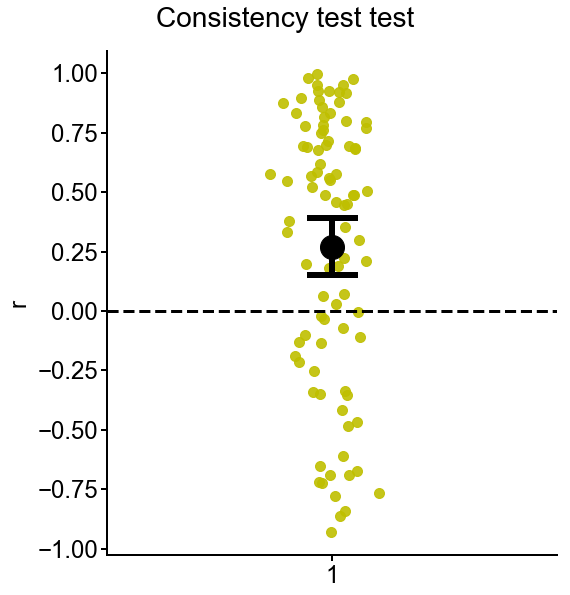

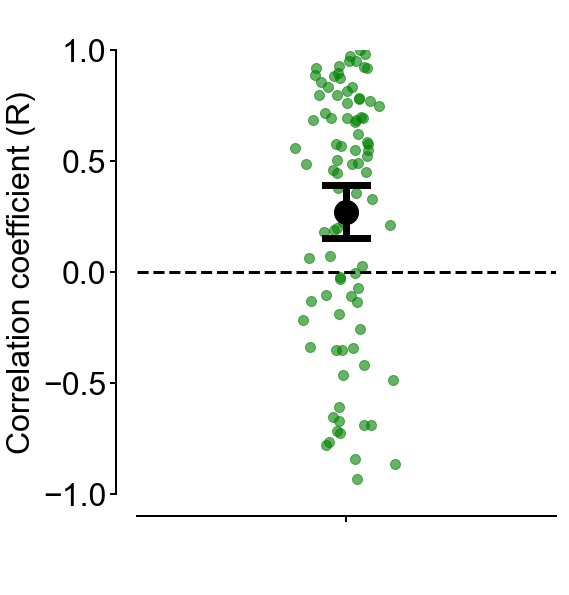

0.2715766054853801 0.0595662844153177
Within-subject consistency
one sample t-test; t-value=  4.533833774820714 p value=  1.798056313700239e-05


In [9]:
# analysing familiarity
sf = pd.pivot_table(data_fam, index=['name'],columns = ['pair'], values=['error'],aggfunc=[np.mean])
display(1-sf)

no_var = np.array([1 if len(np.unique(sf.values[i,:]))==1 else 1 for i in range(sf.values.shape[0])], dtype='bool')
fam_w = 1-sf.values[no_var,:]

rt_con = pd.pivot_table(allRT_cba, index=['name'], columns=['trial_types','pair1'], values=['rt'], aggfunc=[np.median])
display(rt_con)
obj_w = rt_con.values[no_var, :]

consistency = np.zeros(fam_w.shape[0])
consistency_s = np.zeros(fam_w.shape[0])
for i in xrange(fam_w.shape[0]):
    print 'Name:',sf.index[i], x2[i], y1[i]
    for j in range(4):
        print fam_w[i,j],np.array([obj_w[i,12]-obj_w[i,8], obj_w[i,13]-obj_w[i,9], obj_w[i,14]-obj_w[i,10], obj_w[i,15]-obj_w[i,11]])[j]
    consistency[i] = sc.pearsonr(fam_w[i,:], np.array([obj_w[i,12]-obj_w[i,8], obj_w[i,13]-obj_w[i,9], obj_w[i,14]-obj_w[i,10], obj_w[i,15]-obj_w[i,11]]))[0]
    consistency_s[i] = sc.spearmanr(fam_w[i,:], np.array([obj_w[i,12]-obj_w[i,8], obj_w[i,13]-obj_w[i,9], obj_w[i,14]-obj_w[i,10], obj_w[i,15]-obj_w[i,11]]))[0]
    print consistency[i]

data = [[[consistency]]]
ErrorBarsForMeans(data, SpreadOfX = 0.1, YError = 'CI', plotsize = [8,8], axeslimit = [], axisLabels = [[],['r']], SameAxisLabel = True, SubplotTitles = [], SameSubplotTitles = True, plotTitle = 'Consistency test test', ThresValue = [0], AxisTicks = [[],[]], SaveFigName = [], Outliers = [],titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},axisFont = {'fontname':'Arial', 'size':'24'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':'k', 'DotsColor':'y', 'DotsTransp':0.9, 'OutlierDotsColor':'r'})

data = [[[consistency]]]

ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [8,8], 
                  axeslimit = [[-1],[1.00001],[0.5]], 
                  axisLabels = [[' ',' '],['Correlation coefficient (R)']], 
                  SameAxisLabel = False, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = ' ', 
                  ThresValue = [0], 
                  AxisTicks = [[' '],[]], 
                  SaveFigName = figpath+'/exp2_consistency.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  Axis = 'left',
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                  axisFont = {'fontname':'Arial', 'size':'32'},
                  ErrorBar = {'ErrLen':0.1, 'ErrWid1':7, 'ErrWid2':7, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['g','y','y','y','y'], 'DotsTransp':0.6, 'OutlierDotsColor':'r'})

print np.mean(consistency), np.std(consistency)/np.sqrt(len(consistency))
conn1 = sc.ttest_1samp(consistency,0)
print 'Within-subject consistency'
print 'one sample t-test; t-value= ', conn1[0], 'p value= ', conn1[1]
np.savetxt(filepath+'results/consistency.csv',consistency)

# Correlation between object and chunk effects

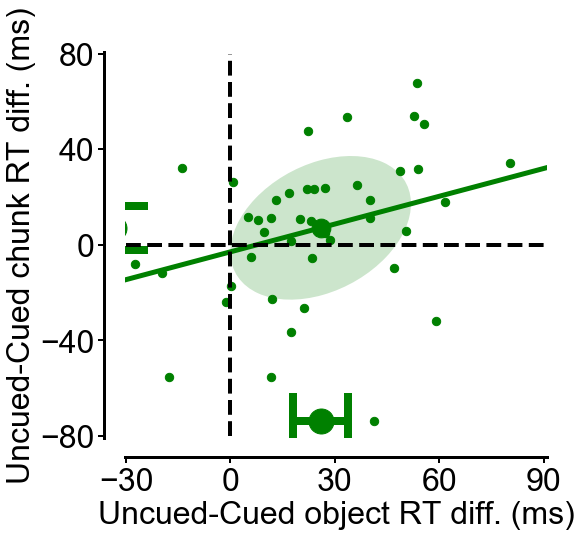

Correlation btw. OBA and CBA object effect 0.3346252525499548 0.02640578587198724 0.580562845857188 0.032732416917754865


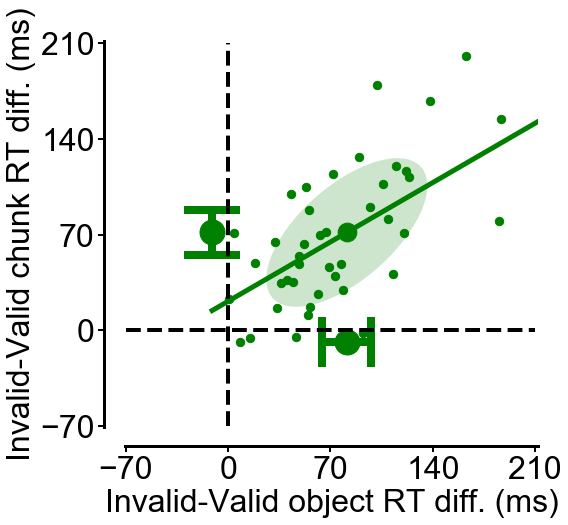

Correlation btw. OBA and CBA validity effect 0.6283655075851268 4.9511260621985155e-06 0.7833543741386493 0.39981357453889954


In [10]:
multi = 1000
crit=1.96 # the confidence level in z scores
xlab = ['Uncued-Cued object RT diff. (ms)', 'Invalid-Valid object RT diff. (ms)']
ylab = ['Uncued-Cued chunk RT diff. (ms)', 'Invalid-Valid chunk RT diff. (ms)']
savelab = ["object", "validity"]
for i,j in zip(range(2),[(3,2),(1,0)]):
    x = (RTs[1][i].values[:,j[0]]-RTs[1][i].values[:,j[1]])
    y = (RTs[0][i].values[:,j[0]]-RTs[0][i].values[:,j[1]])

    if i==0:
        lim1 = [[-0.03*multi],[0.0900000001*multi],[0.03*multi]]
        lim2 = [[-0.08*multi],[0.0800000001*multi],[0.04*multi]]
    else:
        lim1 = [[-0.07*multi],[0.2100000001*multi],[0.07*multi]]
        lim2 = [[-0.07*multi],[0.2100000001*multi],[0.07*multi]]

    data = [
        [
            [[x*multi, y[above_82]*multi]]
        ]

    ]
    ScatterForCorrelation(data,
                            SpreadOfX = 0.1,
                            YError = 'CI',
                            NoStd = 1,
                            plotsize = [8,8],
                            axeslimitX = lim1,
                            axeslimitY = lim2,
                            axisLabels = [[xlab[i]],[ylab[i]]],
                            SameAxisLabel = True,
                            ConditionLabels = [],
                            SameConditionLabels = True,
                            SubplotTitles = [],
                            SameSubplotTitles = False,
                            plotTitle = '',
                            ThresValue = [0,0],
                            SameThresValue = True,
                            RegressionLine = [True],
                            AxisTicks = [[],[]],
                            SameAxisTicks = True,
                            SaveFigName = figpath+'Exp2_Corr_OBA_CBA_'+savelab[i]+'.pdf',
                            Outliers = [],
                            SameErrorEllipseColor = True,
                            ErrorEllipse = {'color':['g','r'],'alpha':0.2},
                            axisTouching = True,
                            ErrorBar = {'ErrDist':[[0.0001],[0.05]], 'ErrSize':0.7, 'ErrWid':8, 'sizedots':70, 'sizeMean':25,
                                        'ErrColor':['g','r'], 'DotsColor':['g','r'],'OutlierDotsColor':'r','RegLineWid':5},
                            titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                            axisFont = {'fontname':'Arial', 'size':'32'},
                            LegendPos = {'LegendPosition':'upper left'},
                            FigureLayout = [1,1.3,1.8,0.85])

    # correlations
    r1,p1 = sc.pearsonr(x, y[above_82])
    # CIs in pearson
    r1_CU=np.tanh(np.arctanh(r1)+(1.03/np.sqrt(len(x)-3))*crit)
    r1_CL=np.tanh(np.arctanh(r1)-(1.03/np.sqrt(len(x)-3))*crit)
    print 'Correlation btw. OBA and CBA '+savelab[i]+' effect', r1,p1,r1_CU,r1_CL
    np.savetxt(filepath+'results/OBA_CBA_corr_'+savelab[i]+'.csv',np.vstack(((x, y[above_82]))).T)

# Analyzing chunk-based effect in trials containing two pairs only

CBA
Descriptive stat:
RT 0.680829138888889 0.13855653165565526
RT  Invalid: 0.7072306555555555 0.14709654207565415
RT  Valid: 0.6335268333333334 0.13215043460966075
RT  Invalid-valid: 0.07370382222222223 0.06966969235260971
RT  Cued: 0.7127895166666666 0.14924779847119002
RT  Uncued: 0.7024921055555556 0.14332678429361062
RT  Uncued-cued: 0.01029741111111111 0.0377413381322698
Significance of the Effects
N: 90
T test for CBA effect in RT:  Ttest_relResult(statistic=2.5739835135360587, pvalue=0.011706451486964923) -0.27284170675195435
T test for CBA validity effect in RT:  Ttest_relResult(statistic=9.980243126175555, pvalue=3.517272786086688e-16) -1.0579036555694135


OBA
Descriptive stat:
RT 0.6145950681818182 0.08042794706292532
RT  Invalid: 0.6431783181818181 0.0949854078491133
RT  Valid: 0.5646860795454545 0.07146710629818251
RT  Invalid-valid: 0.07849223863636362 0.06184298030032195
RT  Cued: 0.6532909772727273 0.10363432075199197
RT  Uncued: 0.6335395909090908 0.08964614498792617


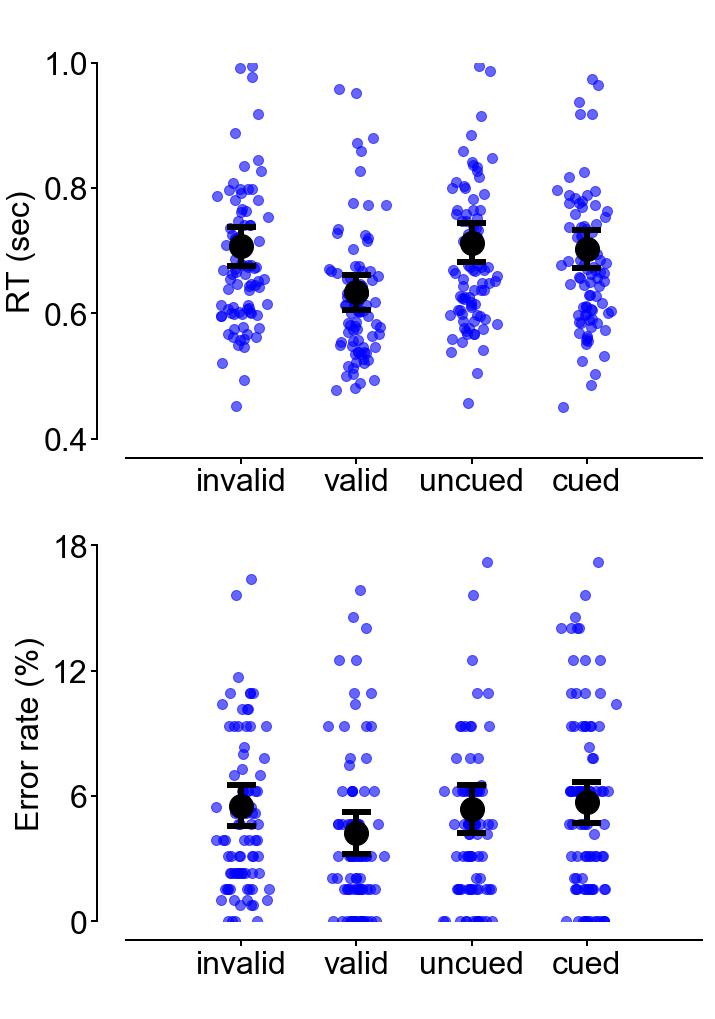

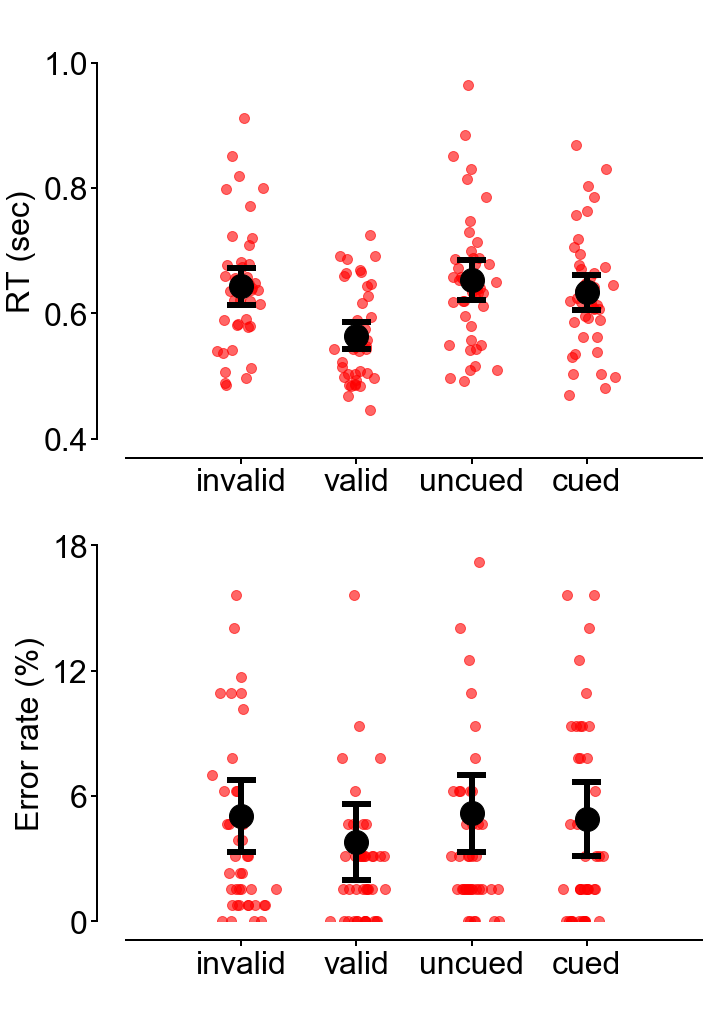

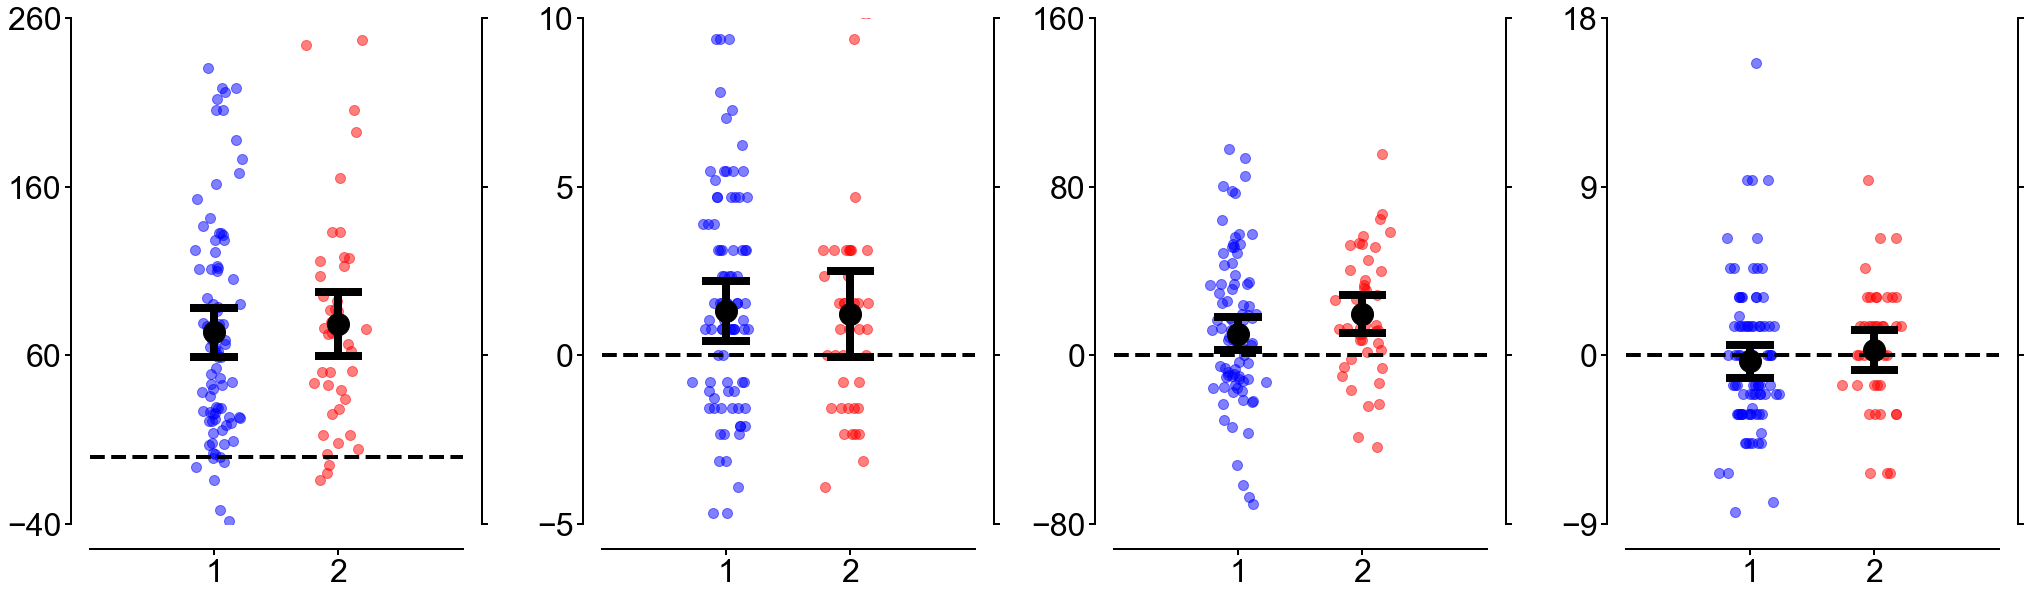

In [11]:
type_lab = ["CBA", "OBA"]
behave_lab = ["RT","err"]
above_82 = np.unique(data_RT_err[0][0][0]['name'])>49
for t,types in enumerate(data_RT_err):
    oba = []
    cba = []
    for g,group in enumerate(types):
        frames = []
        for dataset in group:
            frames.append(dataset[dataset['pair2']<9])
        
        D_all = pd.concat(frames)
        ## Extracting sum stat
        if t==0:
            D = pd.pivot_table(D_all, index=['name'], columns=['trial_types'], values=['rt'], aggfunc=[np.median])
            D_v = pd.pivot_table(D_all, index=['name'], columns=['validity'], values=['rt'], aggfunc=[np.median])
            D_m = pd.pivot_table(D_all, index=['name'], values=['rt'], aggfunc=[np.median])
        else:
            D = pd.pivot_table(D_all, index=['name'], columns=['trial_types'], values=['error'], aggfunc=[np.mean])
            D_v = pd.pivot_table(D_all, index=['name'], columns=['validity'], values=['error'], aggfunc=[np.mean])
            D_m = pd.pivot_table(D_all, index=['name'], values=['error'], aggfunc=[np.mean]) 
        
        ## Statistics on the sum stat
        #descriptive
        print type_lab[g]
        print "Descriptive stat:"
        print behave_lab[t], np.mean(D_m.values), np.std(D_m.values)
        print behave_lab[t]," Invalid:", np.mean(D_v.values[:,1]), np.std(D_v.values[:,1])
        print behave_lab[t], " Valid:", np.mean(D_v.values[:,0]), np.std(D_v.values[:,0])
        print behave_lab[t], " Invalid-valid:", np.mean(D_v.values[:,1]-D_v.values[:,0]), np.std(D_v.values[:,1]-D_v.values[:,0])
        print behave_lab[t], " Cued:", np.mean(D.values[:,2]), np.std(D.values[:,2])
        print behave_lab[t], " Uncued:", np.mean(D.values[:,1]), np.std(D.values[:,1])
        print behave_lab[t], " Uncued-cued:", np.mean(D.values[:,2]-D.values[:,1]), np.std(D.values[:,2]-D.values[:,1])
        #stat test
        print "Significance of the Effects"
        print 'N:', len(D.values[:,2])
        X1 = D.values[:,2]
        X2 = D.values[:,1]
        print 'T test for '+type_lab[g]+' effect in '+behave_lab[t]+': ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
        np.savetxt(filepath+"results/"+type_lab[g]+'_'+behave_lab[t]+'1.csv', np.vstack(((X1,X2))).T)

        X1 = D_v.values[:,1]
        X2 = D_v.values[:,0]
        print 'T test for '+type_lab[g]+' validity effect in '+behave_lab[t]+': ', sc.ttest_rel(X1,X2), (0-np.mean(X1-X2))/np.std(X1-X2)
        print "\n"
        np.savetxt(filepath+"results/"+type_lab[g]+'_'+behave_lab[t]+'_v1.csv', np.vstack(((X1,X2))).T)
        if g==0:
            cba.append([D,D_v,D_m])
        else:
            oba.append([D,D_v,D_m])
                   
    # comparing chunks and objects
    print "\n"
    X1 = oba[0][2].values
    X2 = cba[0][2].values[above_82,:]
    print 'Comparing object and shape: '
    print (behave_lab[t],' diff: ',sc.ttest_rel(X1,X2),(0-np.mean(X1-X2))/np.std(X1-X2))
    np.savetxt(filepath+"results/"+behave_lab[t]+'_diff1.csv', np.hstack(((X1, X2))))

    print 'Validity:'
    N1 = len(oba[0][1].values[:,1]-oba[0][1].values[:,0])
    N2 = len(cba[0][1].values[above_82,1]-cba[0][1].values[above_82,0])
    X1 = oba[0][1].values[:,1]-oba[0][1].values[:,0]
    X2 = cba[0][1].values[above_82,1]-cba[0][1].values[above_82,0]
    print behave_lab[t], ' diff: ', sc.ttest_ind(X1,X2), (np.mean(X1)-np.mean(X2))/np.sqrt( (((N1-1)*np.std(X1)**2) + ((N2-1)*np.std(X2)**2)) / (N1+N2))
    np.savetxt(filepath+'results/OBA_CBA_diff_v_'+behave_lab[t]+'1.csv', np.vstack(((X1, X2))).T)

    print 'Object:'
    N1 = len(oba[0][0].values[:,2]-oba[0][0].values[:,1])
    N2 = len(cba[0][0].values[above_82,2]-cba[0][0].values[above_82,1])
    X1 = oba[0][0].values[:,2]-oba[0][0].values[:,1]
    X2 = cba[0][0].values[above_82,2]-cba[0][0].values[above_82,1]
    print behave_lab[t],' diff: ', sc.ttest_ind(X1,X2), (np.mean(X1)-np.mean(X2))/np.sqrt( (((N1-1)*np.std(X1)**2) + ((N2-1)*np.std(X2)**2)) / (N1+N2))
    print "\n"
    np.savetxt(filepath+'results/OBA_CBA_diff_'+behave_lab[t]+'1.csv', np.vstack(((X1, X2))).T)
    
    if t==0:
        RTs = [cba[0],oba[0]]
    else:
        Errs = [cba[0],oba[0]]

## plots
data = [[[RTs[0][1].values[:,1], RTs[0][1].values[:,0], RTs[0][0].values[:,2], RTs[0][0].values[:,1]],
         [Errs[0][1].values[:,1]*100, Errs[0][1].values[:,0]*100, Errs[0][0].values[:,2]*100, Errs[0][0].values[:,1]*100]]]

ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [10,14], 
                  axeslimit = [[0.4,0,0.4,0],[1.0001,18.00001,1.0001,18.00001],[0.2,6,0.2,6]], 
                  axisLabels = [[' ',' ',' ',' '],['RT (sec)', 'Error rate (%)']], 
                  SameAxisLabel = False, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = ' ', 
                  ThresValue = [], 
                  AxisTicks = [['invalid','valid','uncued','cued'],[]], 
                  SaveFigName = figpath+'exp2_descriptive_CBA1.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['b','b','b','b'], 'DotsTransp':0.6, 'OutlierDotsColor':'r'})

data = [[[RTs[1][1].values[:,1], RTs[1][1].values[:,0], RTs[1][0].values[:,2], RTs[1][0].values[:,1]],
         [Errs[1][1].values[:,1]*100, Errs[1][1].values[:,0]*100, Errs[1][0].values[:,2]*100, Errs[1][0].values[:,1]*100]]]
ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [10,14], 
                  axeslimit = [[0.4,0,0.4,0],[1.0001,18.00001,1.0001,18.00001],[0.2,6,0.2,6]], 
                  axisLabels = [[' ',' ',' ',' '],['RT (sec)', 'Error rate (%)', 'RT (sec)', 'Error rate (%)']], 
                  SameAxisLabel = False, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = ' ', 
                  ThresValue = [], 
                  AxisTicks = [['invalid','valid','uncued','cued'],[]], 
                  SaveFigName = figpath+'exp2_descriptive_OBA1.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.1, 'ErrWid1':6, 'ErrWid2':6, 'sizeMean':24, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['r','r','r','r'], 'DotsTransp':0.6, 'OutlierDotsColor':'r'})

multi1 = 100
multi2 = 1000
data = [[[(RTs[0][1].values[:,1]-RTs[0][1].values[:,0])*multi2,(RTs[1][1].values[:,1]-RTs[1][1].values[:,0])*multi2]],
        [[(Errs[0][1].values[:,1]-Errs[0][1].values[:,0])*multi1,(Errs[1][1].values[:,1]-Errs[1][1].values[:,0])*multi1]],
        [[(RTs[0][0].values[:,2]-RTs[0][0].values[:,1])*multi2, (RTs[1][0].values[:,2]-RTs[1][0].values[:,1])*multi2]],
        [[(Errs[0][0].values[:,2]-Errs[0][0].values[:,1])*multi1, (Errs[1][0].values[:,2]-Errs[1][0].values[:,1])*multi1]]]

lim = [[-0.04*multi2,-0.05*multi1,-0.08*multi2,-0.09*multi1],[0.26000000001*multi2,0.10000000001*multi1,0.16000000001*multi2,0.18000000001*multi1],[0.1*multi2,0.05*multi1,0.08*multi2,0.09*multi1]]
ErrorBarsForMeans(data, 
                  SpreadOfX = 0.1,
                  YError = 'CI', 
                  plotsize = [28,8], 
                  axeslimit = lim, 
                  axisLabels = [[],[]], 
                  SameAxisLabel = True, 
                  SubplotTitles = [], 
                  SameSubplotTitles = False, 
                  plotTitle = '', 
                  ThresValue = [0,0,0,0], 
                  AxisTicks = [[],[]], 
                  SaveFigName = figpath+'/exp2_CBA_OBA1.pdf', 
                  Outliers = [],
                  axisTouching = True,
                  Axis = 'both',
                  titleFont = {'fontname':'Arial', 'size':'28', 'color':'black', 'weight':'normal','verticalalignment':'bottom'},
                        axisFont = {'fontname':'Arial', 'size':'32'},
                        ErrorBar = {'ErrLen':0.16, 'ErrWid1':8, 'ErrWid2':8, 'sizeMean':22, 'sizedots':10, 'ErrColor':['k','k','k','k'], 'DotsColor':['b','r','b','r'], 'DotsTransp':.5, 'OutlierDotsColor':'r'},
                 FigureLayout = [1,5.2,1,1])